# Session 1 solution

## Setup


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
edgecolors= ['k' , 'r', 'g' , 'c' , 'm' , 'y', 'b'] # nice colours for the plots

binning = np.linspace(100, 3100, num=50) # for m_yy

lumi = 1298.1 # fb

## Task 1: inspect example signal file


In [5]:
observables = ["photon1_pT", 
               "photon2_pT", 
               "photon1_phi", 
               "photon2_phi", 
               "photon1_eta", 
               "photon2_eta", 
               "dEta", 
               "n_jets", 
               "average_jet_pT", 
               "lead_jets_dPhi", 
               "n_leptons", 
               "photon1_isolation", 
               "photon2_isolation", 
               "missing_energy"]
# photon 1 and 2 momenta, azimuthal angles, pseudorapidity, delta pseudorapidity, isolations (amount of energy nearby), number of jets in the event, average jet pT, missing energy, number of leptons...

## Task2:  inspect the top few events in the samples

In [9]:
signal_1000_file = "datasets/signal_1000.csv"
signal_1000 = pd.read_csv(signal_1000_file)
signal_1000

Unnamed: 0  photon1_pT  photon2_pT  photon1_phi  photon2_phi  \
0              0  319.616499  308.622518     6.275373     2.608722   
1              1  243.938825  217.494356     0.267735     6.015268   
2              2  217.738955  615.944584     4.755119     5.616583   
3              3  433.990858  265.205803     1.241267     0.431296   
4              4  222.152852  302.299283     6.010377     1.477203   
...          ...         ...         ...          ...          ...   
9995        9995  201.906022  271.389912     5.361064     2.956654   
9996        9996  266.084777  282.005752     4.649526     3.616107   
9997        9997  197.984826  308.184362     5.676525     4.870756   
9998        9998  245.923791  246.610979     2.304605     1.472335   
9999        9999  232.072278  266.319338     2.052315     2.057943   

      photon1_eta  photon2_eta      dEta  n_jets  average_jet_pT  \
0       -2.696496    -0.603640  2.092856     1.0      144.855226   
1        2.685592    -0.288621  2.974214     2.0       98.967777   
2       -2.430240    -0.308261  2.121979     3.0      431.318580   
3       -2.617422    -0.347844  2.269578     2.0      164.811513   
4        2.418028    -0.327237  2.745265     2.0       86.586363   
...           ...          ...       ...     ...             ...   
9995    -2.152854     0.675084  2.827938     2.0      144.645998   
9996    -0.956934     1.697301  2.654236     5.0       81.164776   
9997     3.979714     1.187982  2.791732     2.0      160.943927   
9998     3.013442     0.089573  2.923869     2.0      422.904438   
9999     2.707308    -0.203215  2.910523     4.0      185.339326   

      lead_jets_dPhi  n_leptons  photon1_isolation  photon2_isolation  \
0           0.461421        0.0           0.665189           0.873575   
1          13.869339        1.0           0.774641           0.721872   
2          -0.547305        1.0           0.694535           0.737126   
3          -0.432653        2.0           0.572098           0.753682   
4           0.357934        0.0           0.695961           0.764624   
...              ...        ...                ...                ...   
9995        0.716468        0.0           0.645186           0.649348   
9996        2.236620        0.0           0.764184           0.540385   
9997        1.290755        1.0           0.630639           0.747772   
9998       10.401754        2.0           0.783768           0.603180   
9999        1.687389        1.0           0.678164           0.476507   

      missing_energy  
0           0.082801  
1           0.166426  
2           0.084122  
3           0.030999  
4           0.069547  
...              ...  
9995        0.053867  
9996        0.016162  
9997        0.064273  
9998        0.151920  
9999        0.136491  

[10000 rows x 15 columns]

## Task3: make basic histogram of each observable


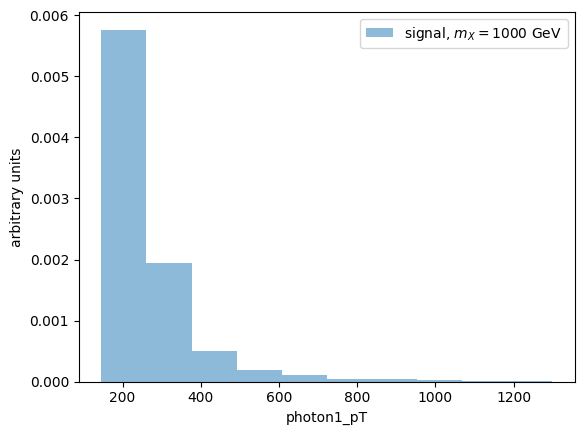

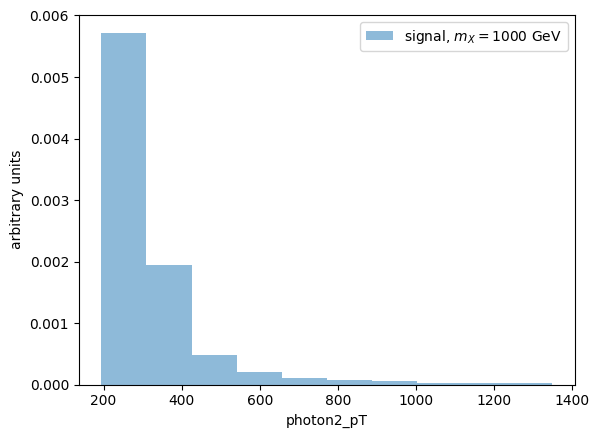

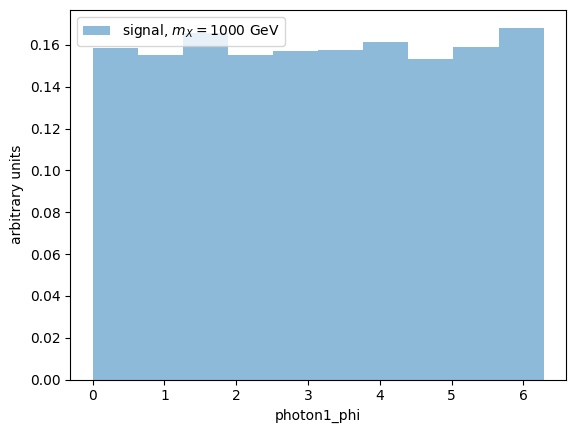

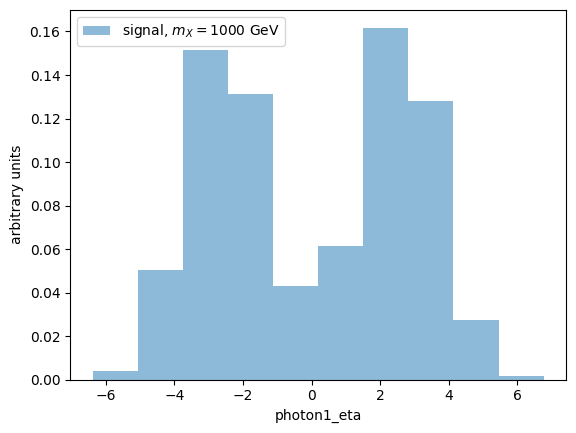

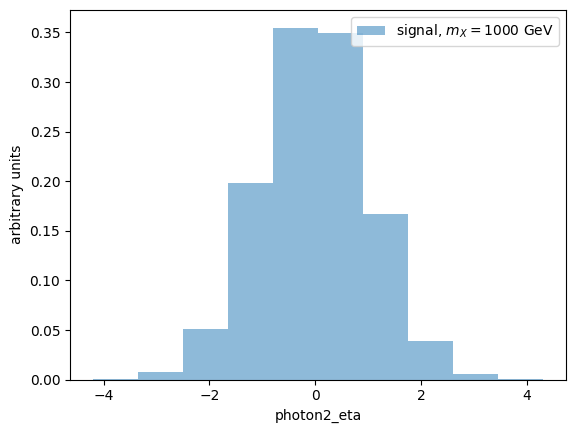

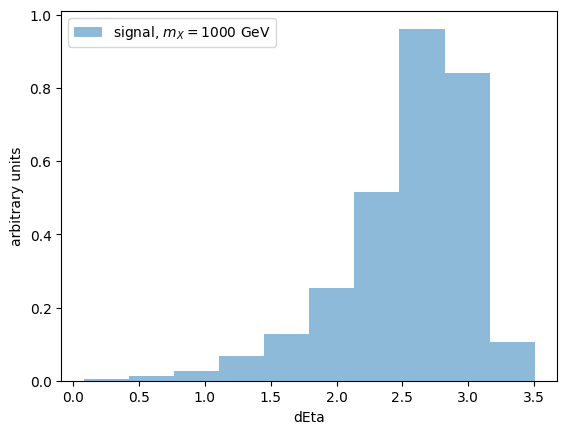

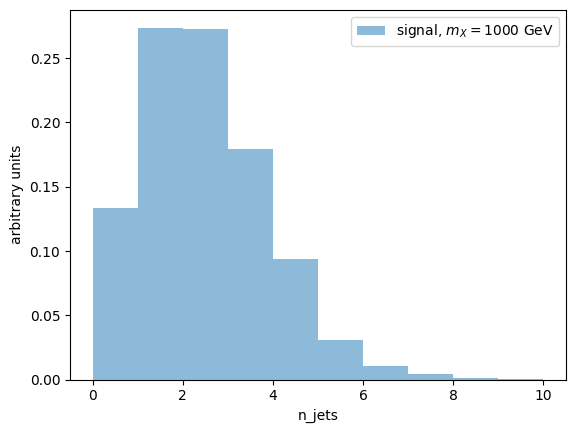

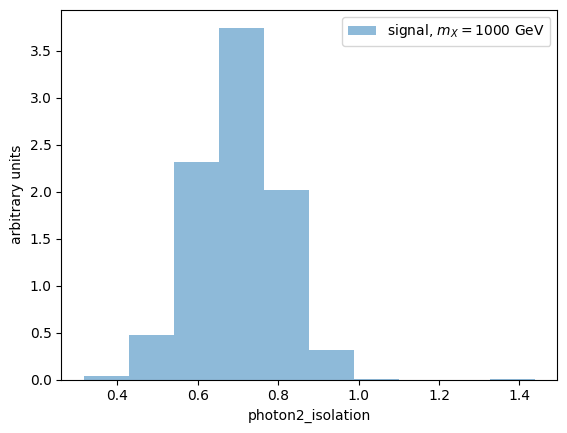

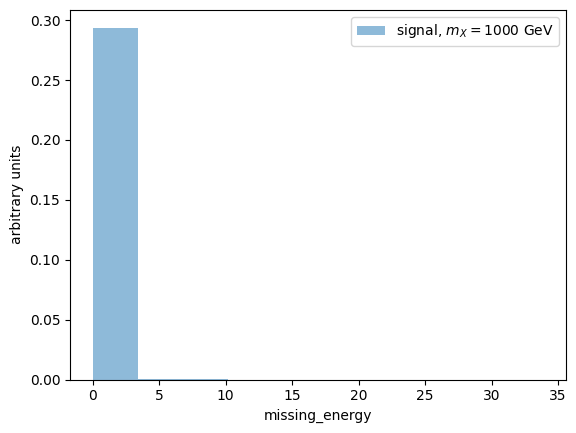

<Figure size 640x480 with 0 Axes>

In [15]:
for obs in observables:
  data = np.array(signal_1000[obs])
  plt.hist(data, label = "signal, $m_X =1000$ GeV", alpha=0.5, density=1)
  plt.legend()
  plt.ylabel("arbitrary units")
  plt.xlabel(obs)
  plt.show()
  plt.clf()


## Task4: make a basic histogram of each obs, but for all samples


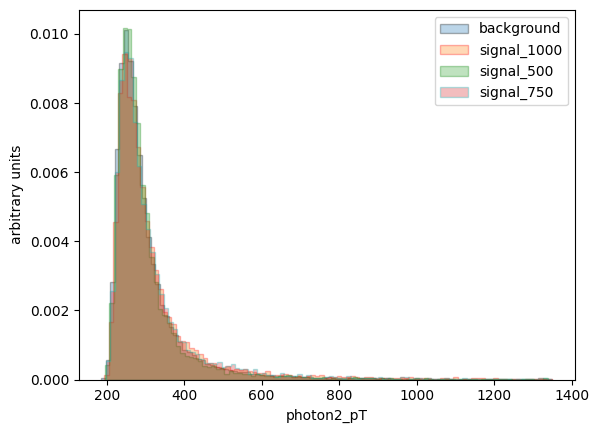

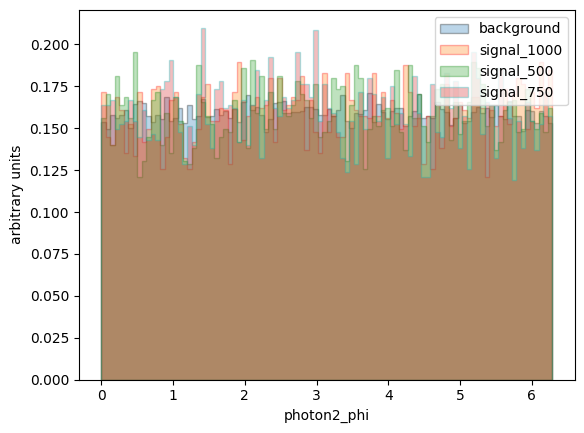

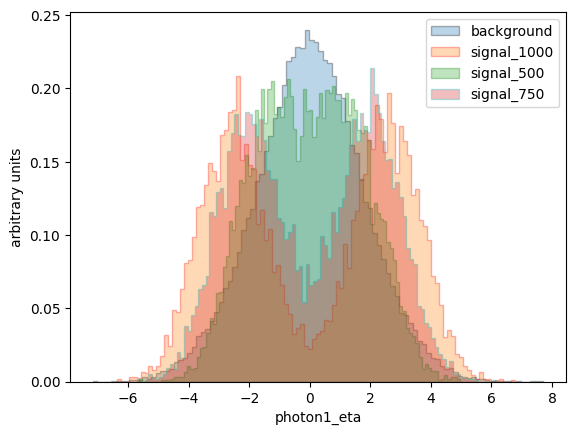

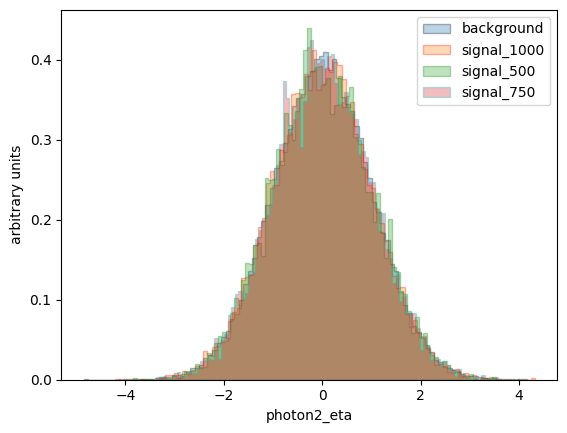

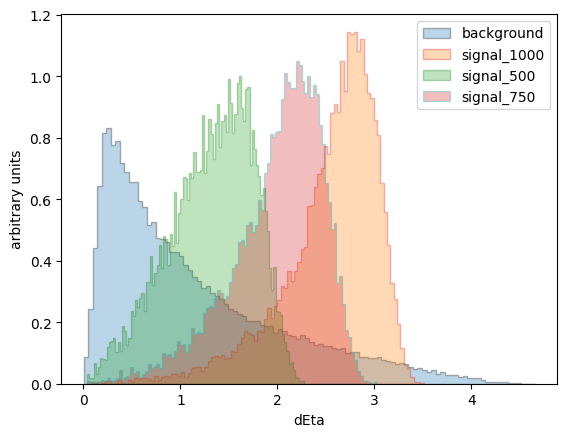

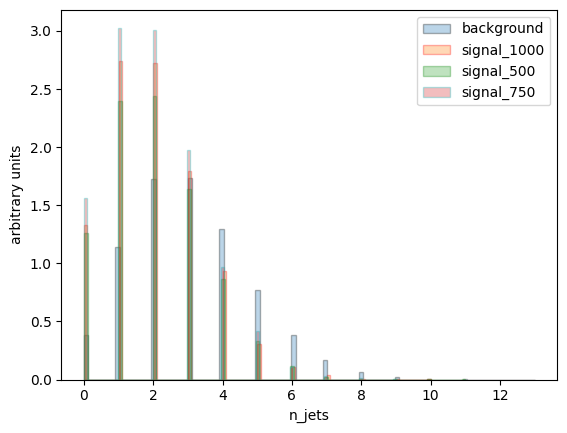

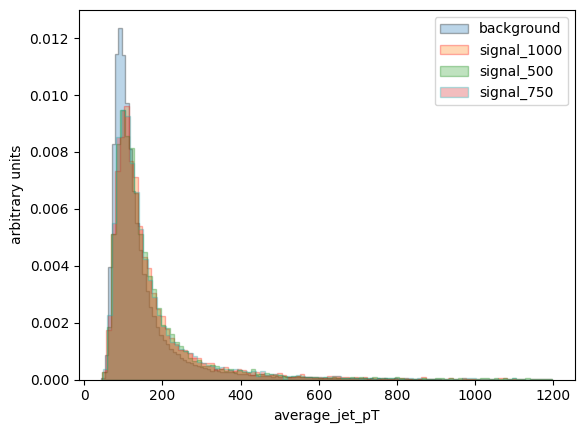

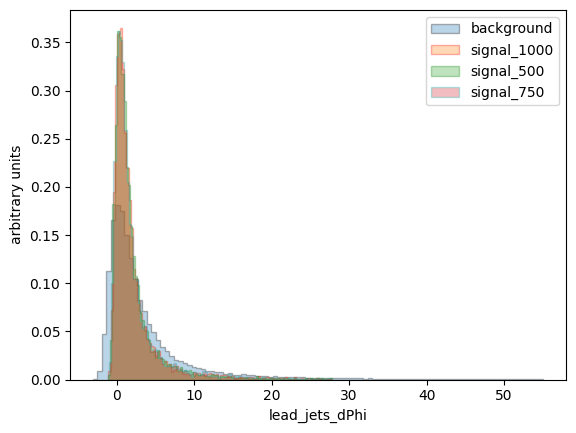

<Figure size 640x480 with 0 Axes>

In [20]:
samples = ["datasets/signal_500.csv","datasets/signal_750.csv", "datasets/signal_1000.csv", "datasets/background.csv"]
sampleDict = {}

for sample in samples:
  sample_name = sample.split("/")[-1].split(".csv")[0]
  sampleDict[sample_name] = pd.read_csv(sample)

for obs in observables:
  for i, (s_name, s_data) in enumerate(sorted(sampleDict.items())):
    data = np.array(s_data[obs])
    plt.hist(data, 100, label = s_name, alpha=0.3, density=1, edgecolor = edgecolors[i] , histtype='stepfilled')
  plt.legend()
  plt.ylabel("arbitrary units")
  plt.xlabel(obs)
  plt.show()
  plt.clf()

## Task5: add in myy ($m_{\gamma\gamma}$)

0 background Index(['Unnamed: 0', 'photon1_pT', 'photon2_pT', 'photon1_phi', 'photon2_phi',
       'photon1_eta', 'photon2_eta', 'dEta', 'n_jets', 'average_jet_pT',
       'lead_jets_dPhi', 'n_leptons', 'photon1_isolation', 'photon2_isolation',
       'missing_energy', 'myy'],
      dtype='object')
1 signal_1000 Index(['Unnamed: 0', 'photon1_pT', 'photon2_pT', 'photon1_phi', 'photon2_phi',
       'photon1_eta', 'photon2_eta', 'dEta', 'n_jets', 'average_jet_pT',
       'lead_jets_dPhi', 'n_leptons', 'photon1_isolation', 'photon2_isolation',
       'missing_energy', 'myy'],
      dtype='object')
2 signal_500 Index(['Unnamed: 0', 'photon1_pT', 'photon2_pT', 'photon1_phi', 'photon2_phi',
       'photon1_eta', 'photon2_eta', 'dEta', 'n_jets', 'average_jet_pT',
       'lead_jets_dPhi', 'n_leptons', 'photon1_isolation', 'photon2_isolation',
       'missing_energy', 'myy'],
      dtype='object')
3 signal_750 Index(['Unnamed: 0', 'photon1_pT', 'photon2_pT', 'photon1_phi', 'photon2_phi',
       

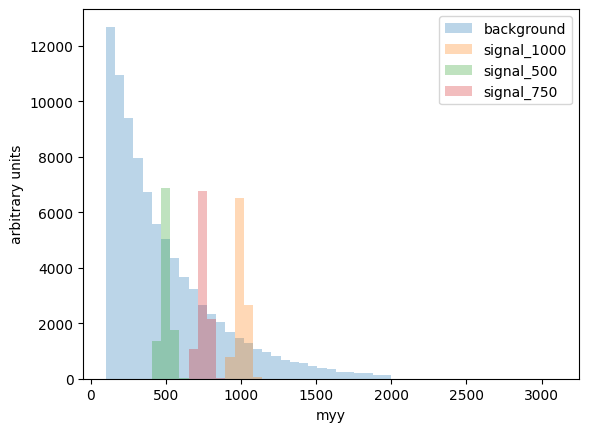

<Figure size 640x480 with 0 Axes>

In [22]:

for sample_name in sampleDict.keys():
  ds = sampleDict[sample_name]
  sampleDict[sample_name]["myy"] = ( 2 * ds["photon1_pT"]  * ds["photon2_pT"]  * (np.cosh(ds["photon1_eta"] - ds["photon2_eta"]) - np.cos(ds["photon1_phi"]- ds["photon2_phi"]))) ** 0.5


for obs in ["myy"]:
  for i, (s_name, s_data) in enumerate(sorted(sampleDict.items())):
    print (i, s_name, s_data.keys())
    data = np.array(s_data[obs])
    plt.hist(data, binning, label = s_name, alpha=0.3,  histtype='stepfilled') # , weights=lumi*cross_sections_times_filter_eff_by_total_N[s_name]*np.ones(len(data)))
  plt.legend()
  plt.ylabel("arbitrary units")
  plt.xlabel(obs)
  plt.show()
  plt.clf()

## Task 6 and 7 : add normalisation and uncertainties


In [24]:
cross_sections_times_filter_eff_by_total_N ={
"background": 1286.5*0.081/len(sampleDict["background"]),
"signal_1000":5.4*0.17/len(sampleDict["signal_1000"]),
"signal_750":5.4*0.17/len(sampleDict["signal_750"]),
"signal_500":5.4*0.17/len(sampleDict["signal_500"]),
}

for obs in ["myy"]:
  for i, (s_name, s_data) in enumerate(sorted(sampleDict.items())):
    print (i, s_name, s_data.keys())
    data = np.array(s_data[obs])
    n, bins, _ = plt.hist(data, binning, label = s_name, alpha=0.3,  histtype='stepfilled', color=edgecolors[i], weights=lumi*cross_sections_times_filter_eff_by_total_N[s_name]*np.ones(len(data)))
    mid = 0.5*(bins[1:] + bins[:-1])
    lab_stat = None
    lab_syst = None
    if i==0 :
      lab_stat = "Stat Errs"
      lab_syst = "Syst Errs"
    plt.errorbar(mid, n, yerr=n**0.5, fmt='none', label=lab_stat, color=edgecolors[i])
    plt.fill_between(mid, n*0.9, n*1.1, color=edgecolors[i], alpha=0.2, label= lab_syst)

  plt.legend()
  plt.ylabel("arbitrary units")
  plt.xlabel(obs)
  plt.show()
  plt.clf()

0 background Index(['Unnamed: 0', 'photon1_pT', 'photon2_pT', 'photon1_phi', 'photon2_phi',
       'photon1_eta', 'photon2_eta', 'dEta', 'n_jets', 'average_jet_pT',
       'lead_jets_dPhi', 'n_leptons', 'photon1_isolation', 'photon2_isolation',
       'missing_energy', 'myy'],
      dtype='object')
1 signal_1000 Index(['Unnamed: 0', 'photon1_pT', 'photon2_pT', 'photon1_phi', 'photon2_phi',
       'photon1_eta', 'photon2_eta', 'dEta', 'n_jets', 'average_jet_pT',
       'lead_jets_dPhi', 'n_leptons', 'photon1_isolation', 'photon2_isolation',
       'missing_energy', 'myy'],
      dtype='object')
2 signal_500 Index(['Unnamed: 0', 'photon1_pT', 'photon2_pT', 'photon1_phi', 'photon2_phi',
       'photon1_eta', 'photon2_eta', 'dEta', 'n_jets', 'average_jet_pT',
       'lead_jets_dPhi', 'n_leptons', 'photon1_isolation', 'photon2_isolation',
       'missing_energy', 'myy'],
      dtype='object')
3 signal_750 Index(['Unnamed: 0', 'photon1_pT', 'photon2_pT', 'photon1_phi', 'photon2_phi',
       

<Figure size 640x480 with 0 Axes>